In [2]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
crime_data = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/fbc884a5c8d45a0636e1d6b000021632a0861986/hate-crimes/hate_crimes.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  state = col_character(),
  median_household_income = col_double(),
  share_unemployed_seasonal = col_double(),
  share_population_in_metro_areas = col_double(),
  share_population_with_high_school_degree = col_double(),
  share_non_citizen = col_double(),
  share_white_poverty = col_double(),
  gini_index = col_double(),
  share_non_white = col_double(),
  share_voters_voted_trump = col_double(),
  hate_crimes_per_100k_splc = col_double(),
  avg_hatecrimes_per_100k_fbi = col_double()
)




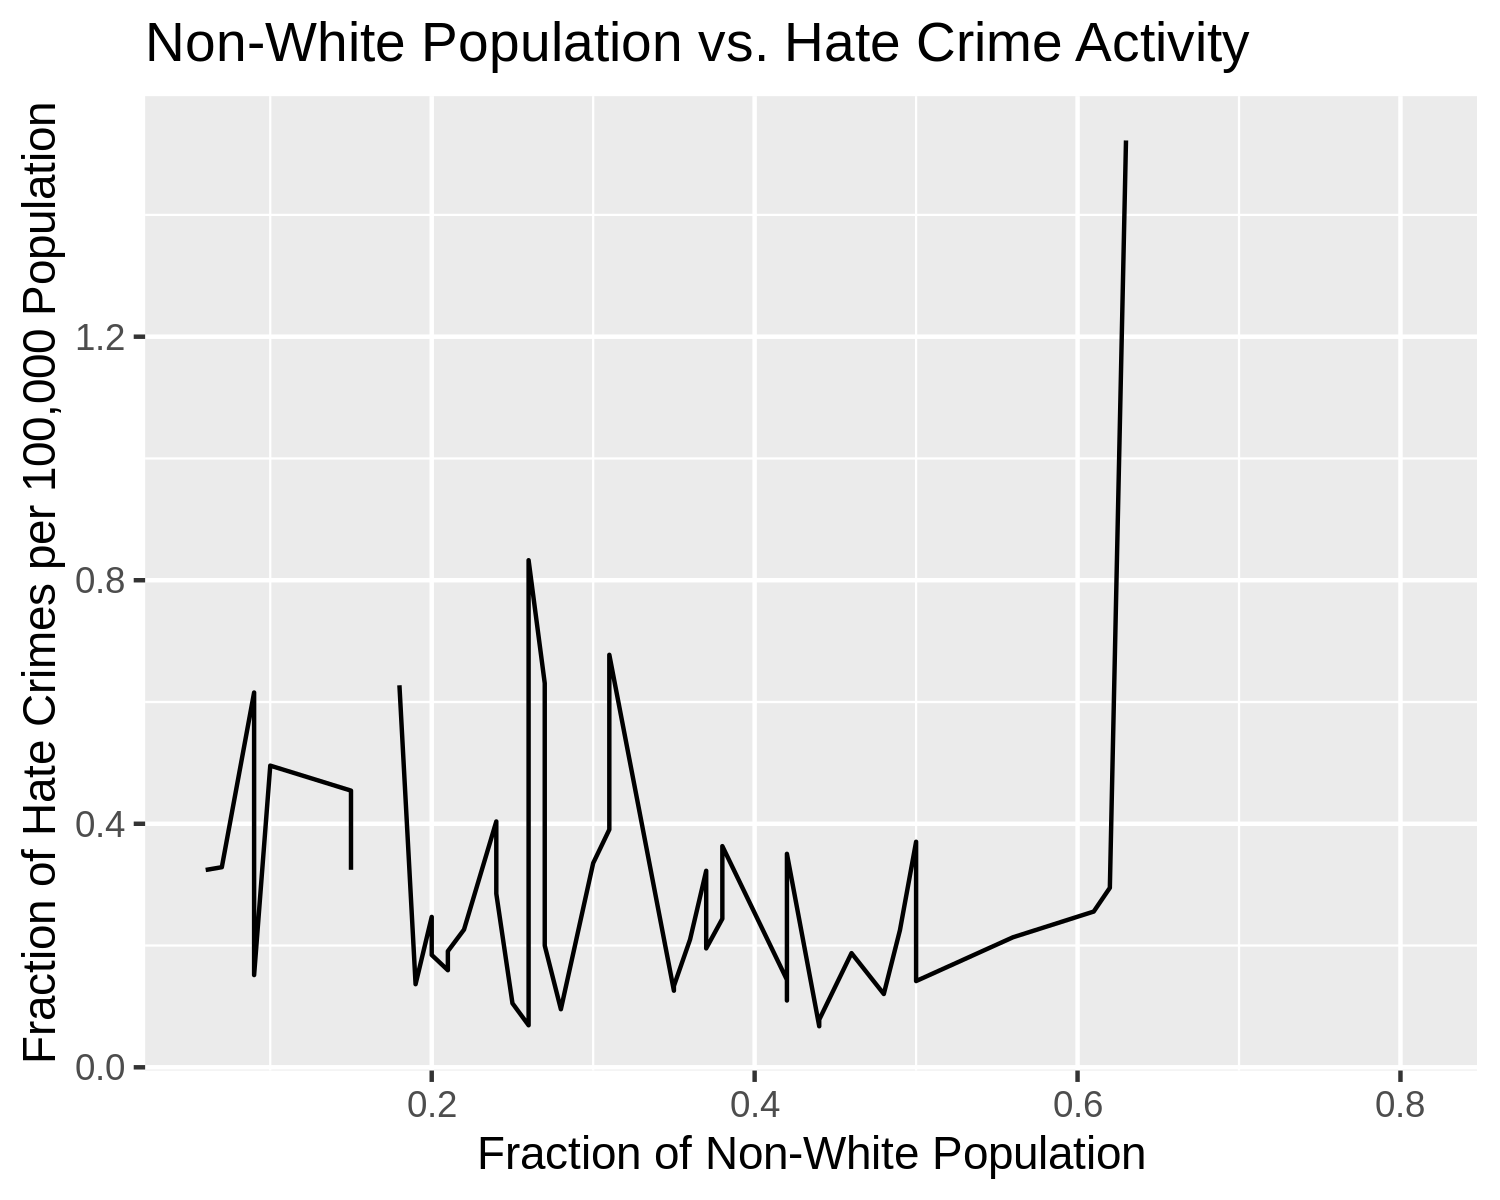

In [5]:
p = ggplot(data = crime_data, aes(x=share_non_white, y=hate_crimes_per_100k_splc))
p = p + geom_line(na.rm = TRUE)
p = p + labs(title= 'Non-White Population vs. Hate Crime Activity', 
             x= 'Fraction of Non-White Population',y= 'Fraction of Hate Crimes per 100,000 Population')
p


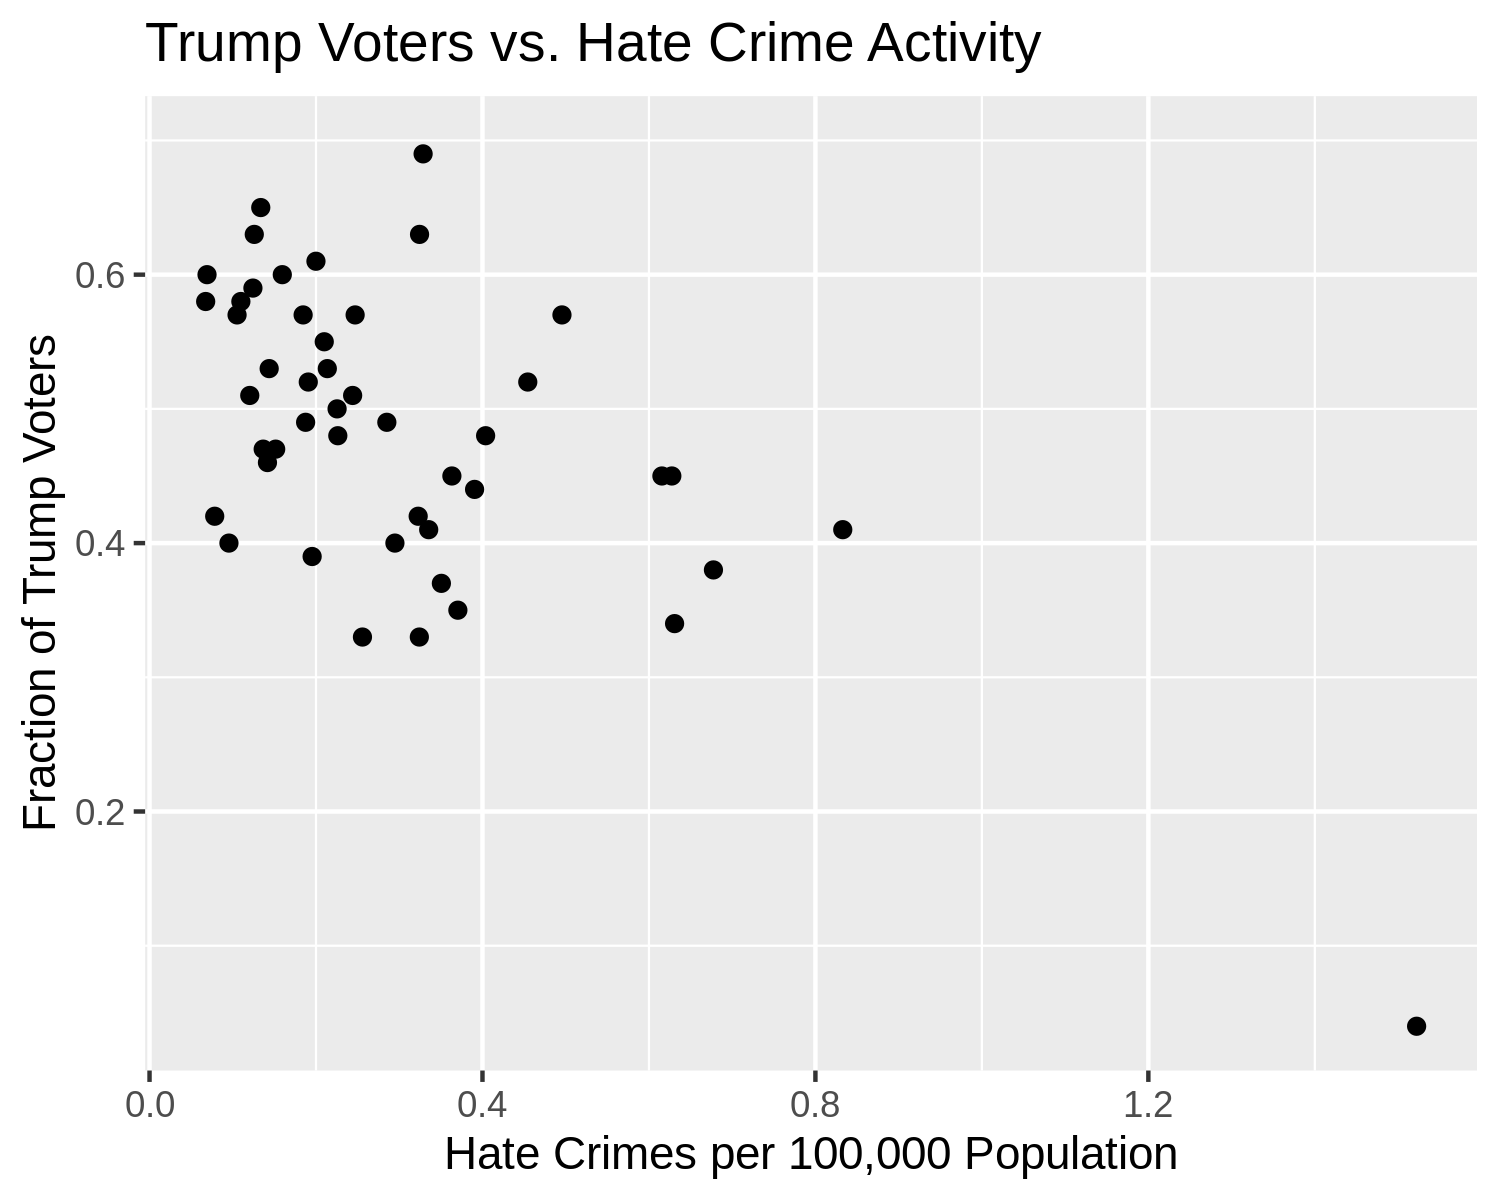

In [8]:
p = ggplot(crime_data, aes(y= share_voters_voted_trump, x = hate_crimes_per_100k_splc))
p = p + geom_point(na.rm = TRUE)
p = p + labs(title= 'Trump Voters vs. Hate Crime Activity', 
             x= 'Hate Crimes per 100,000 Population',y= 'Fraction of Trump Voters')
p


Warning message:
“Removed 4 rows containing non-finite values (stat_ecdf).”
Warning message:
“Removed 4 rows containing non-finite values (stat_ecdf).”


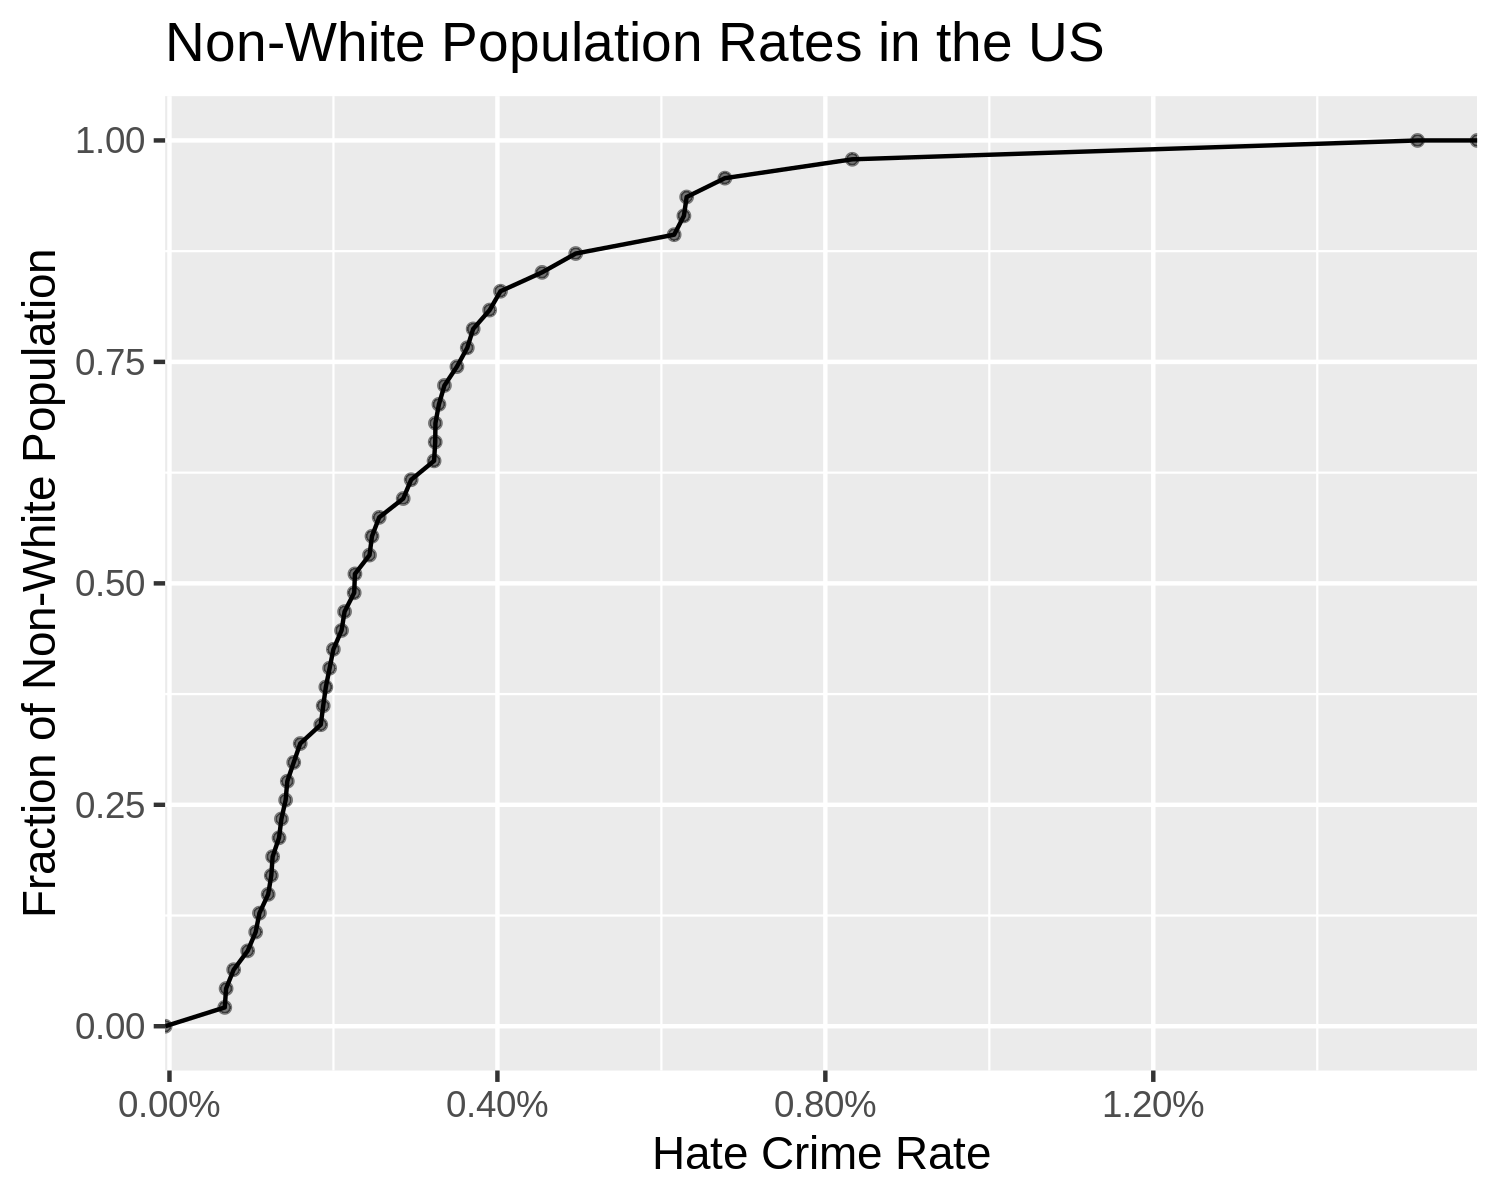

In [9]:
y = mutate(crime_data,share_non_white = row_number())
p = ggplot(y, aes(x = hate_crimes_per_100k_splc, y = share_non_white))
p = p + stat_ecdf(geom = 'point', size = 1, alpha = 0.5) + stat_ecdf(geom = 'line', size = .5) 
p = p +labs(title="Non-White Population Rates in the US",
        x ="Hate Crime Rate", y = "Fraction of Non-White Population") +scale_x_continuous(labels = scales::percent_format(scale = 1))
p


In each of these three graphs, I wanted to create a depiction of the relationship between different variables to see whether or not hate crimes in the United States were determined by certain factors. My first graph was a line graph between the non-white population and the number of hate crimes. I created this chart because I wanted to see if the amount of hate crimes increased when the non-white population increased. I used a line graph to see if there was a noticeable change. However, the data overall was pretty scattered, with hate crime being at a high only when the non-white population was really high. Therefore, I concluded that there was a correlation, albeit not a super strong one.

The next graph I created was a scatterplot of Trump voters against hate crimes. I wanted to see if there was any correlation between political ideologies and these actions, and used a scatterplot to depict all the different scenarios. From the graph, there are points scattered all around, and it is very difficult to find a strong correlation. In addition, it is important to note that these conclusions are not an accurate depiction of all voters, regardless of stance. Overall, I noted a strong negative correlation as the number of hate crimes decreased as the fraction of Trump voters decreased.

The last graph was an ECDF of the non-white population versus the hate crime rate. Essentially, it lets me plot the data and see how frequent certain factors are. For example, in this ECDF, I noticed that there are a lot of non-white populations with a hate crime rate of less than .50%. From these 3 graphs, I can make an overall conclusion that factors such as non-white population and the amount of Trump voters impact the hate crime rate in states around the United States. However, I would need additional information from other data sources before making a statement like this that can be controversial.
